In [40]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv("home.csv")
df

,area,price
0,2000,550000
1,2100,650000
2,3000,750000
3,3600,960000
4,4000,1000000


In [3]:
df.describe()

,area,price
count,5.000000,5.000000
mean,2940.000000,782000.000000
std,887.693641,194602.158261
min,2000.000000,550000.000000
25%,2100.000000,650000.000000
50%,3000.000000,750000.000000
75%,3600.000000,960000.000000
max,4000.000000,1000000.000000


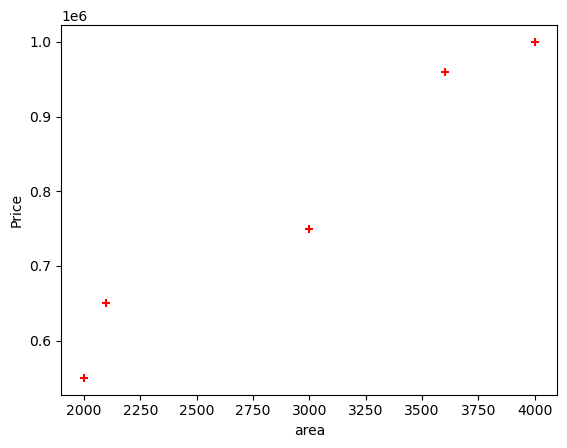

In [6]:
plt.xlabel("area")
plt.ylabel("Price")
plt.scatter(df.area,df.price,color='red',marker='+')

In [19]:
df

,area,price
0,2000,550000
1,2100,650000
2,3000,750000
3,3600,960000
4,4000,1000000


In [20]:
df

,area,price
0,2000,550000
1,2100,650000
2,3000,750000
3,3600,960000
4,4000,1000000


In [21]:
# feature ra label or target lai chutaune 
# yo case ma target or label vaneko price ho
df1=df.drop('price',axis='columns')
# df1=df.drop('price',axis=1) lekhe pani huncha same ho
df1

,area
0,2000
1,2100
2,3000
3,3600
4,4000


In [24]:
# feature ra target lai separate garne
# yo case ma price bahek area matra cha multiple huda pani drop garincha
price = df.price
price

0     550000
1     650000
2     750000
3     960000
4    1000000
Name: price, dtype: int64

In [25]:
# yo univariate ho
# euta matrai feature cha
# create linear regression object
reg = linear_model.LinearRegression()# model load gareko
reg.fit(df1,price)  # fit(feature,target)
# fit vaneko train gareko

LinearRegression()

In [16]:
# predict the price of home with area 3050
reg.predict([[3050]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([805577.41116751])

In [26]:
reg.predict([[2050]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([591237.30964467])

In [18]:
reg.coef_    # m hereko  y = mx + b

array([214.34010152])

In [19]:
reg.intercept_

151840.10152284265

In [20]:
# Y= m*X+b m is the coefficient and b is intercept
214.34010152 * 3050 + 151840.10152284265

805577.4111588426

In [21]:
# area 6600 vako ko price predict garum
reg.predict([[6600]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1566484.7715736])

In [28]:
# generate csv file with lost of home predictions
area_df = pd.read_csv('areas.csv')
area_df

,area
0,1000
1,1500
2,2300
3,2400
4,2500
5,3000
6,3500
7,3700
8,3900
9,4500


In [31]:
p= reg.predict(area_df)
p

array([ 366180.20304569,  473350.25380711,  644822.33502538,
        666256.34517767,  687690.35532995,  794860.40609137,
        902030.45685279,  944898.47715736,  987766.49746193,
       1116370.55837563, 1159238.5786802 , 1180672.58883249,
       1330710.65989848, 1373578.68020305, 1545050.76142132])

In [34]:
area_df['prices']=p

In [35]:
area_df

,area,prices
0,1000,3.661802e+05
1,1500,4.733503e+05
2,2300,6.448223e+05
3,2400,6.662563e+05
4,2500,6.876904e+05
5,3000,7.948604e+05
6,3500,9.020305e+05
7,3700,9.448985e+05
8,3900,9.877665e+05
9,4500,1.116371e+06


In [36]:
area_df.to_csv("prediction.csv")

In [41]:
# linear regression multiple variables
df = pd.read_csv('homeprices.csv')

In [42]:
df

,area,bedroom,age,price
0,2600,2.0,20,55000
1,3000,4.0,15,56500
2,3200,NaN,18,61000
3,3500,3.0,30,59500
4,3700,4.0,19,80000


In [44]:
# data preprocessing
# fill NA values with median values of column
df.bedroom.median()


3.5

In [50]:
df.bedroom=df.bedroom.fillna(df.bedroom.median())
df

,area,bedroom,age,price
0,2600,2.0,20,55000
1,3000,4.0,15,56500
2,3200,3.5,18,61000
3,3500,3.0,30,59500
4,3700,4.0,19,80000


In [35]:
df.corr()
# price sanga kasko kasto relation cha vanera check gareko 

,area,bedroom,age,price
area,1.000000,0.625241,0.357949,0.778199
bedroom,0.625241,1.000000,-0.399580,0.543258
age,0.357949,-0.399580,1.000000,-0.062154
price,0.778199,0.543258,-0.062154,1.000000


In [36]:
# ml ma feature haru target sanga correlated hunuparcha
# but feature haru ek apasma correlated hunu hudaina
# feature independent hunuparcha unique hunu parcha 
# area bedroom ra age feature ho, they should be unique
# area and bedroom are highly correlated
# area and price also highly correlated
# area and age in negative correlation
# conclusion:
#     area and bedroom are close to similar feature any one of them is good for training
#     not both


In [49]:
features=df.drop('price',axis='columns')
reg=linear_model.LinearRegression() # model load gareko
reg.fit(features,df.price)  # fit gareko


LinearRegression()

In [48]:
reg.coef_  # m1 m2 m3 

array([    45.32522031, -13840.35354595,  -2152.66995384])

In [44]:
reg.intercept_   

6946.928766261

In [51]:
# find price of home with 3500 area 4 bedroom adn 30 years aged
reg.predict([[3500,4,30]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45643.68705413])

In [ ]:
# this is multivariate